In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from datasets import load_dataset
import ast

#loading Data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#Data Cleanup 
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
#Only data analyst and in the us data 
df_DA_US=df[(df['job_title_short']=='Data Analyst')& (df['job_country']=='United States')].copy()

#drop Nan values from the column
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].head()

109      89000.0
180      90250.0
410     133285.0
988      62623.0
1413     71300.0
Name: salary_year_avg, dtype: float64

<Axes: >

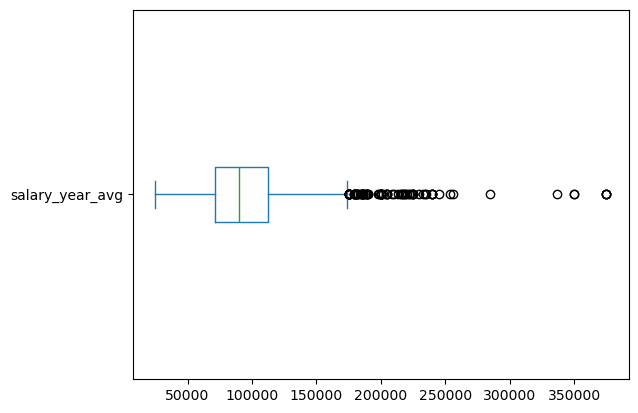

In [5]:
df_DA_US['salary_year_avg'].plot(kind='box',vert=False)

C:\Users\salah manai\AppData\Local\Temp\ipykernel_12884\325107361.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list,labels=job_titles,vert=False)


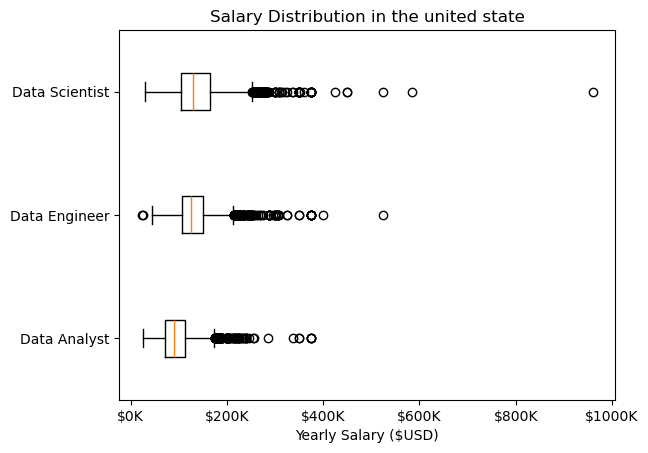

In [18]:
job_titles=['Data Analyst','Data Engineer','Data Scientist']

#Only data analyst and in the us data 
df_US=df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_US=df_US.dropna(subset='salary_year_avg')

job_list= [df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]



plt.boxplot(job_list,labels=job_titles,vert=False)
plt.title('Salary Distribution in the united state')
plt.xlabel('Yearly Salary ($USD)')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))

In [14]:
job_list[1]

92        120000.0
146       129500.0
307       185000.0
339       195000.0
380        97500.0
            ...   
783111    125000.0
784102     90000.0
784191    217500.0
785624    139216.0
785641    150000.0
Name: salary_year_avg, Length: 2915, dtype: float64

In [ ]:
plt.boxplot(job_list,labels=job_titles,vert=False)